# Exploratory data analysis:

## Data Preparation:

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
covid_data = pd.read_csv('/kaggle/input/covid-19-case-surveillance/data.csv')
pulse_survey_data = pd.read_csv('/kaggle/input/household-pulse-survey/pulse_puf_most_recent.csv')

# Display the first few rows and columns of each dataset
print("COVID Data Columns:", covid_data.columns)
print("Pulse Survey Data Columns:", pulse_survey_data.columns)
print(covid_data.head())
print(pulse_survey_data.head())



/tmp/ipykernel_34/1383655405.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data = pd.read_csv('/kaggle/input/covid-19-case-surveillance/data.csv')


COVID Data Columns: Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')
Pulse Survey Data Columns: Index(['scram', 'week_x', 'est_st', 'est_msa', 'pweight', 'tbirth_year',
       'abirth_year', 'egender', 'agender', 'rhispanic',
       ...
       'eipspnd4', 'eipspnd5', 'eipspnd6', 'eipspnd7', 'eipspnd8', 'eipspnd9',
       'eipspnd10', 'eipspnd11', 'eipspnd12', 'eipspnd13'],
      dtype='object', length=215)
  case_month res_state  state_fips_code   res_county  county_fips_code  \
0    2020-12        MN             27.0     HENNEPIN           27053.0   
1    2022-02        MI             26.0      OAKLAND           26125.0   
2    2022-01        CA              6.0  LOS ANGELES     

## Clean Dataset

In [ ]:
# Check unique values in key columns to understand data structure and cleaning needs
print("Unique values in 'hosp_yn':", covid_data['hosp_yn'].unique())
print("Unique values in 'death_yn':", covid_data['death_yn'].unique())
print("Unique values in 'age_group':", covid_data['age_group'].unique())
print("Unique values in 'sex':", covid_data['sex'].unique())
print("Unique values in 'race':", covid_data['race'].unique())

# Fill missing values or handle them appropriately
covid_data['hosp_yn'] = covid_data['hosp_yn'].fillna('Missing')
covid_data['death_yn'] = covid_data['death_yn'].fillna('Missing')
covid_data['age_group'] = covid_data['age_group'].fillna('Missing')
covid_data['sex'] = covid_data['sex'].fillna('Missing')
covid_data['race'] = covid_data['race'].fillna('Missing')

# Convert 'Yes'/'No' to 1/0 for 'hosp_yn' and 'death_yn'
covid_data['hosp_yn'] = covid_data['hosp_yn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))
covid_data['death_yn'] = covid_data['death_yn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

# Verify the cleaning
print("Unique values in 'hosp_yn' after cleaning:", covid_data['hosp_yn'].unique())
print("Unique values in 'death_yn' after cleaning:", covid_data['death_yn'].unique())

# Ensure data types are appropriate
covid_data['case_month'] = pd.to_datetime(covid_data['case_month'], format='%Y-%m', errors='coerce')

# Convert categorical variables to category dtype
covid_data['sex'] = covid_data['sex'].astype('category')
covid_data['race'] = covid_data['race'].astype('category')
covid_data['age_group'] = covid_data['age_group'].astype('category')



Unique values in 'hosp_yn': ['Missing' 'No' 'Yes' 'Unknown']
Unique values in 'death_yn': ['No' 'Unknown' 'Missing' 'Yes' nan]
Unique values in 'age_group': ['18 to 49 years' '65+ years' '0 - 17 years' '50 to 64 years' nan
 'Missing']
Unique values in 'sex': ['Female' 'Male' 'Unknown' nan 'Missing' 'Other']
Unique values in 'race': ['Unknown' 'White' 'Missing' nan 'Black' 'Multiple/Other' 'Asian'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander']
Unique values in 'hosp_yn' after cleaning: [nan  0.  1.]
Unique values in 'death_yn' after cleaning: [ 0. nan  1.]


## 1. Total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

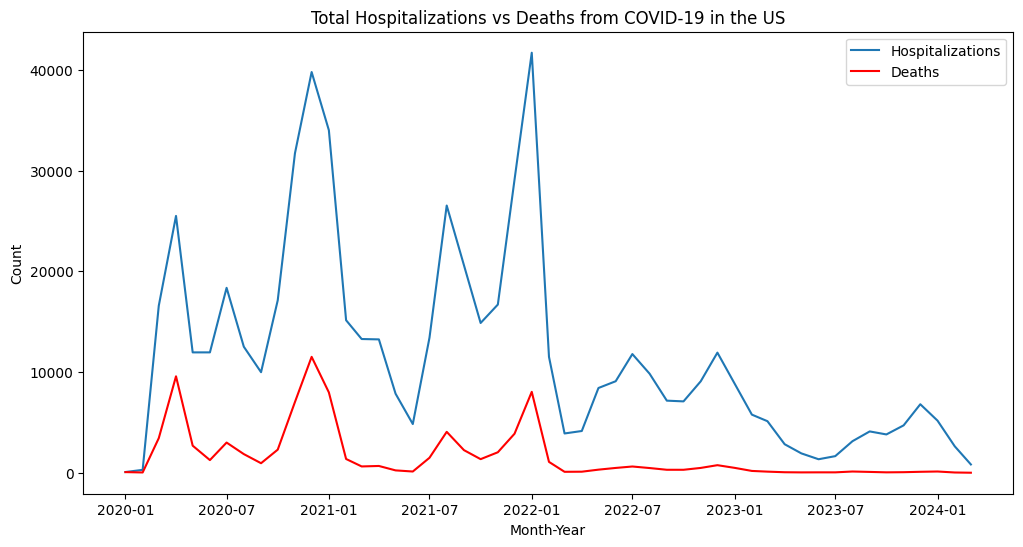

In [ ]:
# Group by month-year and calculate total hospitalizations and deaths
monthly_data = covid_data.groupby('case_month').agg({'hosp_yn': 'sum', 'death_yn': 'sum'}).reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['case_month'], monthly_data['hosp_yn'], label='Hospitalizations')
plt.plot(monthly_data['case_month'], monthly_data['death_yn'], label='Deaths', color='red')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Total Hospitalizations vs Deaths from COVID-19 in the US')
plt.legend()
plt.grid(False)
plt.show()

## 2. Average Rates of COVID-Related Deaths Relative to Patient Demographics

 To analyze the average rates of COVID-related deaths relative to different demographic groups:

### 1- group the data by age, sex, and race and calculate the death rate for each group.

 Death Rate by Age Group:

In [ ]:
# Calculate death rate by age group
age_group_death_rate = covid_data.groupby('age_group')['death_yn'].mean().reset_index()
age_group_death_rate.columns = ['Age Group', 'Death Rate']

/tmp/ipykernel_34/3977264955.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_death_rate = covid_data.groupby('age_group')['death_yn'].mean().reset_index()


Death Rate by Sex:

In [ ]:
# Calculate death rate by sex
sex_death_rate = covid_data.groupby('sex')['death_yn'].mean().reset_index()
sex_death_rate.columns = ['Sex', 'Death Rate']

/tmp/ipykernel_34/2068620161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_death_rate = covid_data.groupby('sex')['death_yn'].mean().reset_index()


Death Rate by Race:

In [ ]:
# Calculate death rate by race
race_death_rate = covid_data.groupby('race')['death_yn'].mean().reset_index()
race_death_rate.columns = ['Race', 'Death Rate']


/tmp/ipykernel_34/613392093.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_death_rate = covid_data.groupby('race')['death_yn'].mean().reset_index()


#### 2- Plot the results to visualize the differences in death rates across these demographic groups.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

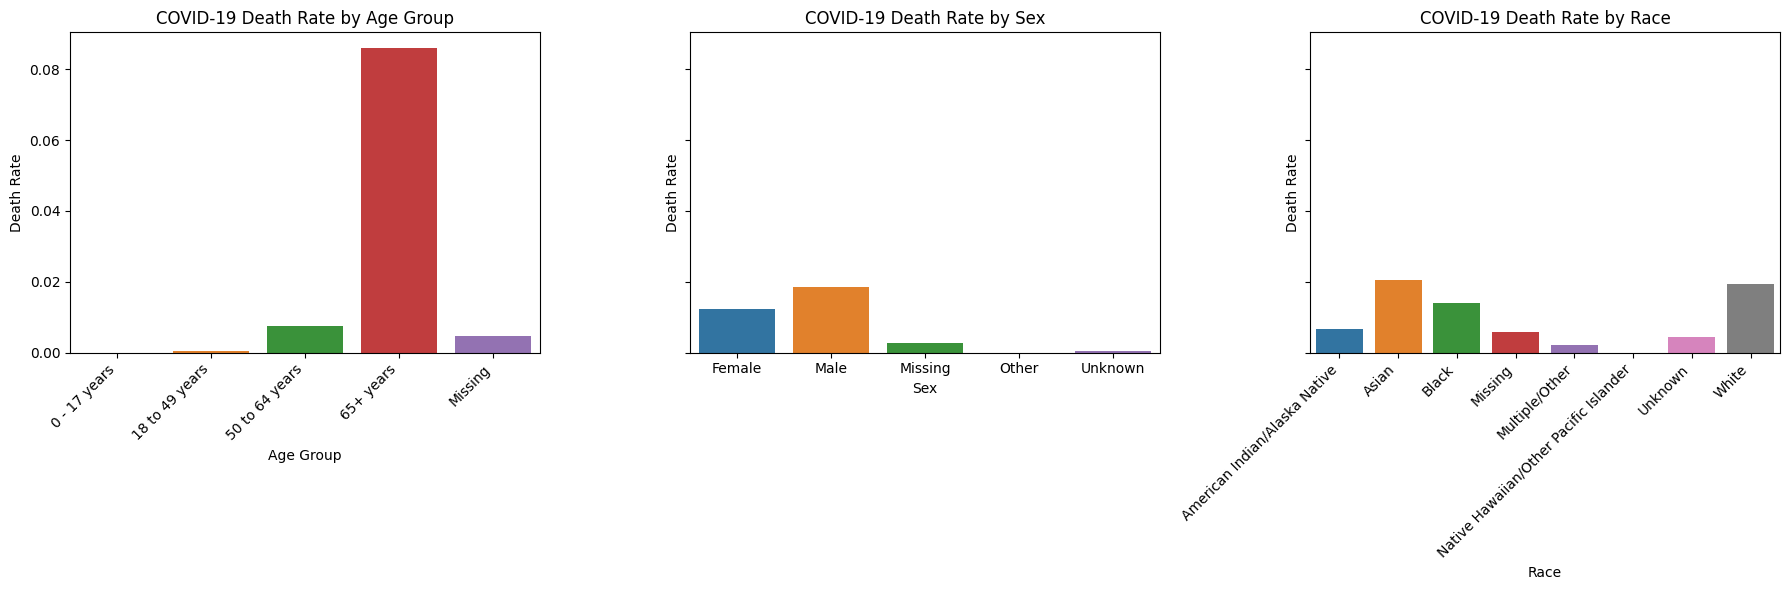

In [ ]:
# Plotting the data
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Age group plot
sns.barplot(x='Age Group', y='Death Rate', data=age_group_death_rate, ax=ax[0])
ax[0].set_title('COVID-19 Death Rate by Age Group')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Sex plot
sns.barplot(x='Sex', y='Death Rate', data=sex_death_rate, ax=ax[1])
ax[1].set_title('COVID-19 Death Rate by Sex')

# Race plot
sns.barplot(x='Race', y='Death Rate', data=race_death_rate, ax=ax[2])
ax[2].set_title('COVID-19 Death Rate by Race')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 3. Rates of COVID-Related Hospitalization and Death with Age Across Age Groups

To analyze the rates of COVID-related hospitalization and death across different age groups:


#### 1- Group by 'age_group' and calculate mean hospitalization and death rates


In [ ]:
age_hospitalization_death = covid_data.groupby('age_group')[['hosp_yn', 'death_yn']].mean().reset_index()
# Display the calculated rates
print(age_hospitalization_death)


/tmp/ipykernel_34/427441487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hospitalization_death = covid_data.groupby('age_group')[['hosp_yn', 'death_yn']].mean().reset_index()


        age_group   hosp_yn  death_yn
0    0 - 17 years  0.017921  0.000000
1  18 to 49 years  0.042811  0.000548
2  50 to 64 years  0.113655  0.007512
3       65+ years  0.281280  0.086094
4         Missing  0.091370  0.004710


#### 3- Merge and plot the data.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


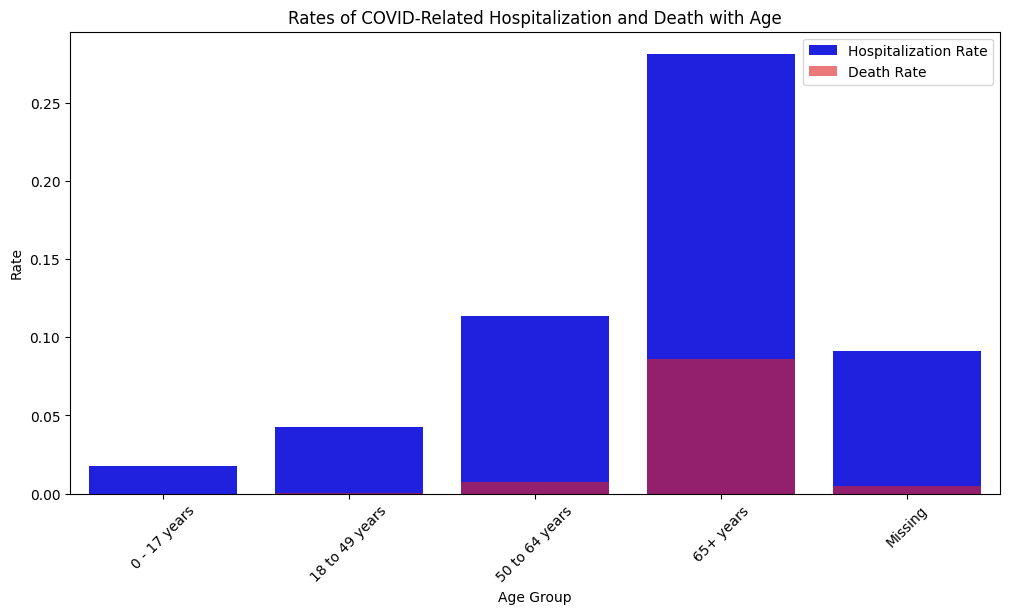

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='hosp_yn', data=age_hospitalization_death, color='blue', label='Hospitalization Rate')
sns.barplot(x='age_group', y='death_yn', data=age_hospitalization_death, color='red', alpha=0.6, label='Death Rate')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Rate')
plt.title('Rates of COVID-Related Hospitalization and Death with Age')
plt.show()

## 4. Average Rate of COVID-Related Hospitalization and Death per State
To analyze the average rates of COVID-related hospitalization and death per state:

#### 1- Calculate the mean hospitalization and death rates for each state.


In [ ]:
# Group by 'state' and calculate mean hospitalization and death rates
state_hospitalization_death = covid_data.groupby('res_state')[['hosp_yn', 'death_yn']].mean().reset_index()

# Display the calculated rates
print(state_hospitalization_death.head())


  res_state   hosp_yn  death_yn
0        AK  0.172978  0.026374
1        AL  0.065982  0.046895
2        AR  0.983216  0.445347
3        AZ  0.174080  0.036942
4        CA  0.065710  0.999233


#### 2- Plot the data.

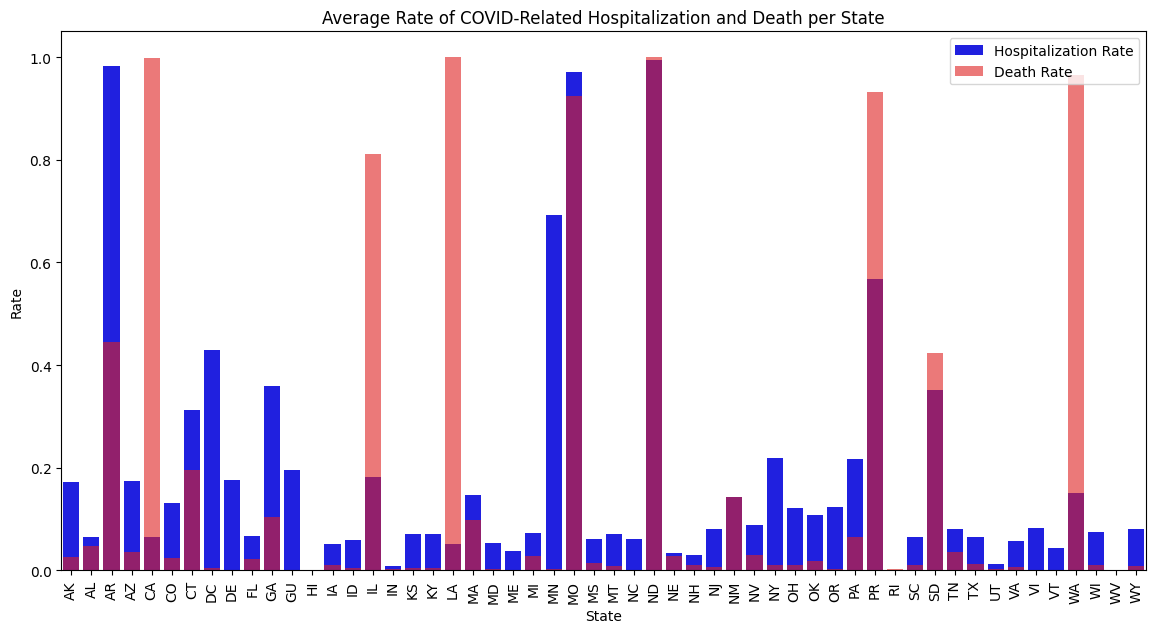

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(x='res_state', y='hosp_yn', data=state_hospitalization_death, color='blue', label='Hospitalization Rate')
sns.barplot(x='res_state', y='death_yn', data=state_hospitalization_death, color='red', alpha=0.6, label='Death Rate')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Rate')
plt.title('Average Rate of COVID-Related Hospitalization and Death per State')
plt.show()

## 5. Relationship Between Age, Pre-existing Medical Conditions/Risk Behaviors, and Rate of ICU Admission

#### 1- Calculate and Plot ICU Admittance Rates by Age Group and Pre-existing Conditions:


In [ ]:
# Convert 'Yes'/'No' to 1/0 for the 'icu_yn' column
covid_data['icu_yn'] = covid_data['icu_yn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

# Group by 'age_group' and 'underlying_conditions_yn' and calculate mean ICU admittance rates
icu_conditions = covid_data.groupby(['age_group', 'underlying_conditions_yn'])['icu_yn'].mean().reset_index()

# Display the calculated rates
print(icu_conditions.head())


/tmp/ipykernel_34/167579806.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icu_conditions = covid_data.groupby(['age_group', 'underlying_conditions_yn'])['icu_yn'].mean().reset_index()


        age_group underlying_conditions_yn    icu_yn
0    0 - 17 years                       No  0.001196
1    0 - 17 years                      Yes  0.026764
2  18 to 49 years                       No  0.003411
3  18 to 49 years                      Yes  0.037140
4  50 to 64 years                       No  0.015410


#### 2- Plot the data.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

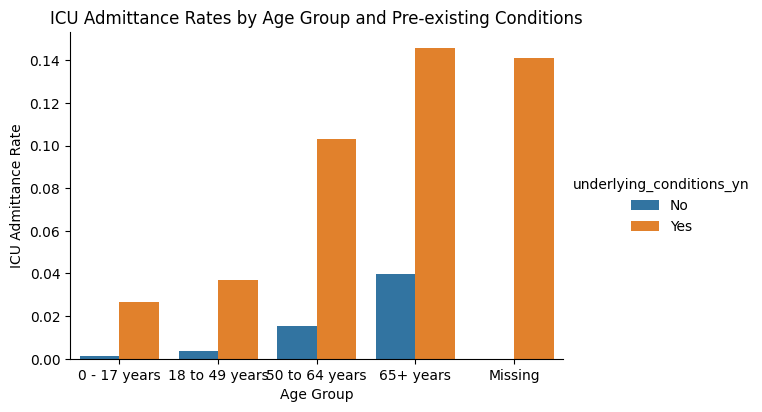

In [ ]:
# Plot the results
sns.catplot(x='age_group', y='icu_yn', hue='underlying_conditions_yn', data=icu_conditions, kind='bar', height=4, aspect=1.5)
plt.xlabel('Age Group')
plt.ylabel('ICU Admittance Rate')
plt.title('ICU Admittance Rates by Age Group and Pre-existing Conditions')
plt.show()

## 6. Rate of Expected Employment Loss Due to COVID-19 and Sector of Employment
#### 1- Calculate and Plot Expected Employment Loss Rates by Employment Sector

In [ ]:
# Convert 'Yes'/'No' to 1/0 for the 'EXPCTLOSS' column and handle special categories
pulse_survey_data['expctloss'] = pulse_survey_data['expctloss'].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

# Group by 'KINDWORK' (sector of employment) and calculate mean expected employment loss rates
employment_loss = pulse_survey_data.groupby('kindwork')['expctloss'].mean().reset_index()


#### 2- Plot the data

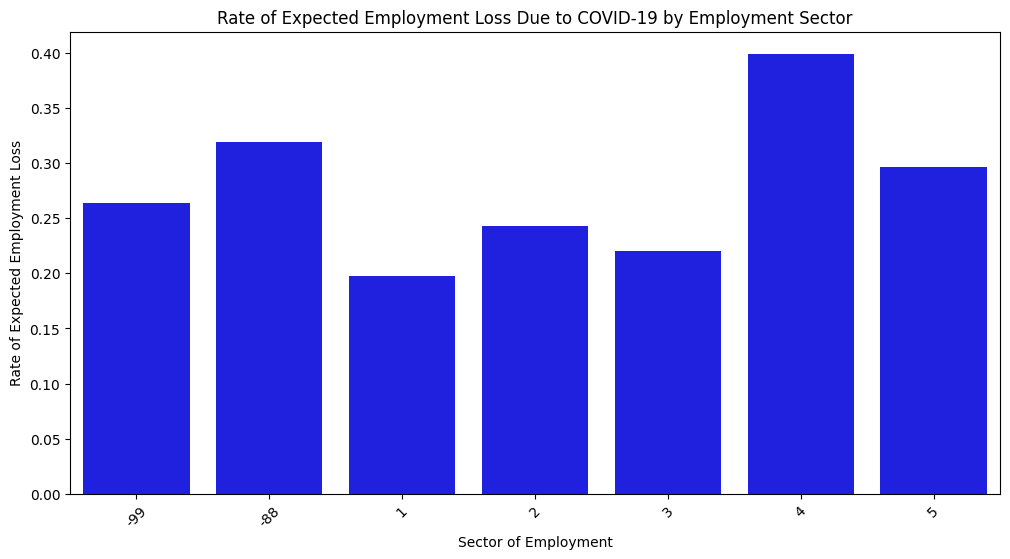

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='kindwork', y='expctloss', data=employment_loss, color='blue')
plt.xticks(rotation=45)
plt.xlabel('Sector of Employment')
plt.ylabel('Rate of Expected Employment Loss')
plt.title('Rate of Expected Employment Loss Due to COVID-19 by Employment Sector')
plt.show()

## 7. Rate of Expected Employment Loss Due to COVID-19 Relative to Responders' Demographics
#### 1- Calculate and Plot Expected Employment Loss Rates by Demographics

Expected Employment Loss Rates by sex


In [ ]:
# Group by 'egender' (sex) and calculate mean expected employment loss rates
gender_employment_loss = pulse_survey_data.groupby('egender')['expctloss'].mean().reset_index()
gender_employment_loss.columns = ['Gender', 'Expected Employment Loss Rate']


# Group by 'rhispanic' (race) and calculate mean expected employment loss rates
race_employment_loss = pulse_survey_data.groupby('rhispanic')['expctloss'].mean().reset_index()
race_employment_loss.columns = ['Race', 'Expected Employment Loss Rate']

Expected Employment loss rate by age group

In [ ]:
# Group by 'tbirth_year' (age group) and calculate mean expected employment loss rates
pulse_survey_data['age_group'] = pd.cut(pulse_survey_data['tbirth_year'], bins=[1900, 1945, 1965, 1985, 2005, 2025],
                                        labels=['Silent Generation', 'Baby Boomers', 'Generation X', 'Millennials', 'Generation Z'])
age_employment_loss = pulse_survey_data.groupby('age_group')['expctloss'].mean().reset_index()
age_employment_loss.columns = ['Age Group', 'Expected Employment Loss Rate']


/tmp/ipykernel_34/1925660159.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_employment_loss = pulse_survey_data.groupby('age_group')['expctloss'].mean().reset_index()


Expected Employment Loss Rate by Race

In [ ]:
# Group by 'rhispanic' (race) and calculate mean expected employment loss rates
#race_employment_loss = pulse_survey_data.groupby('rhispanic')['expctloss'].mean().reset_index()
#race_employment_loss.columns = ['Race', 'Expected Employment Loss Rate']

In [ ]:
# Calculate the rate of expected employment loss for different racial groups
race_employment_loss = pulse_survey_data.groupby('rrace')['expctloss'].mean().reset_index()
race_employment_loss.columns = ['Race', 'Expected Employment Loss Rate']

# Display the calculated rates for verification
print("Employment loss rates by race:\n", race_employment_loss)


Employment loss rates by race:
    Race  Expected Employment Loss Rate
0     1                       0.260510
1     2                       0.388986
2     3                       0.336685
3     4                       0.384785


#### 2- Plot the data

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


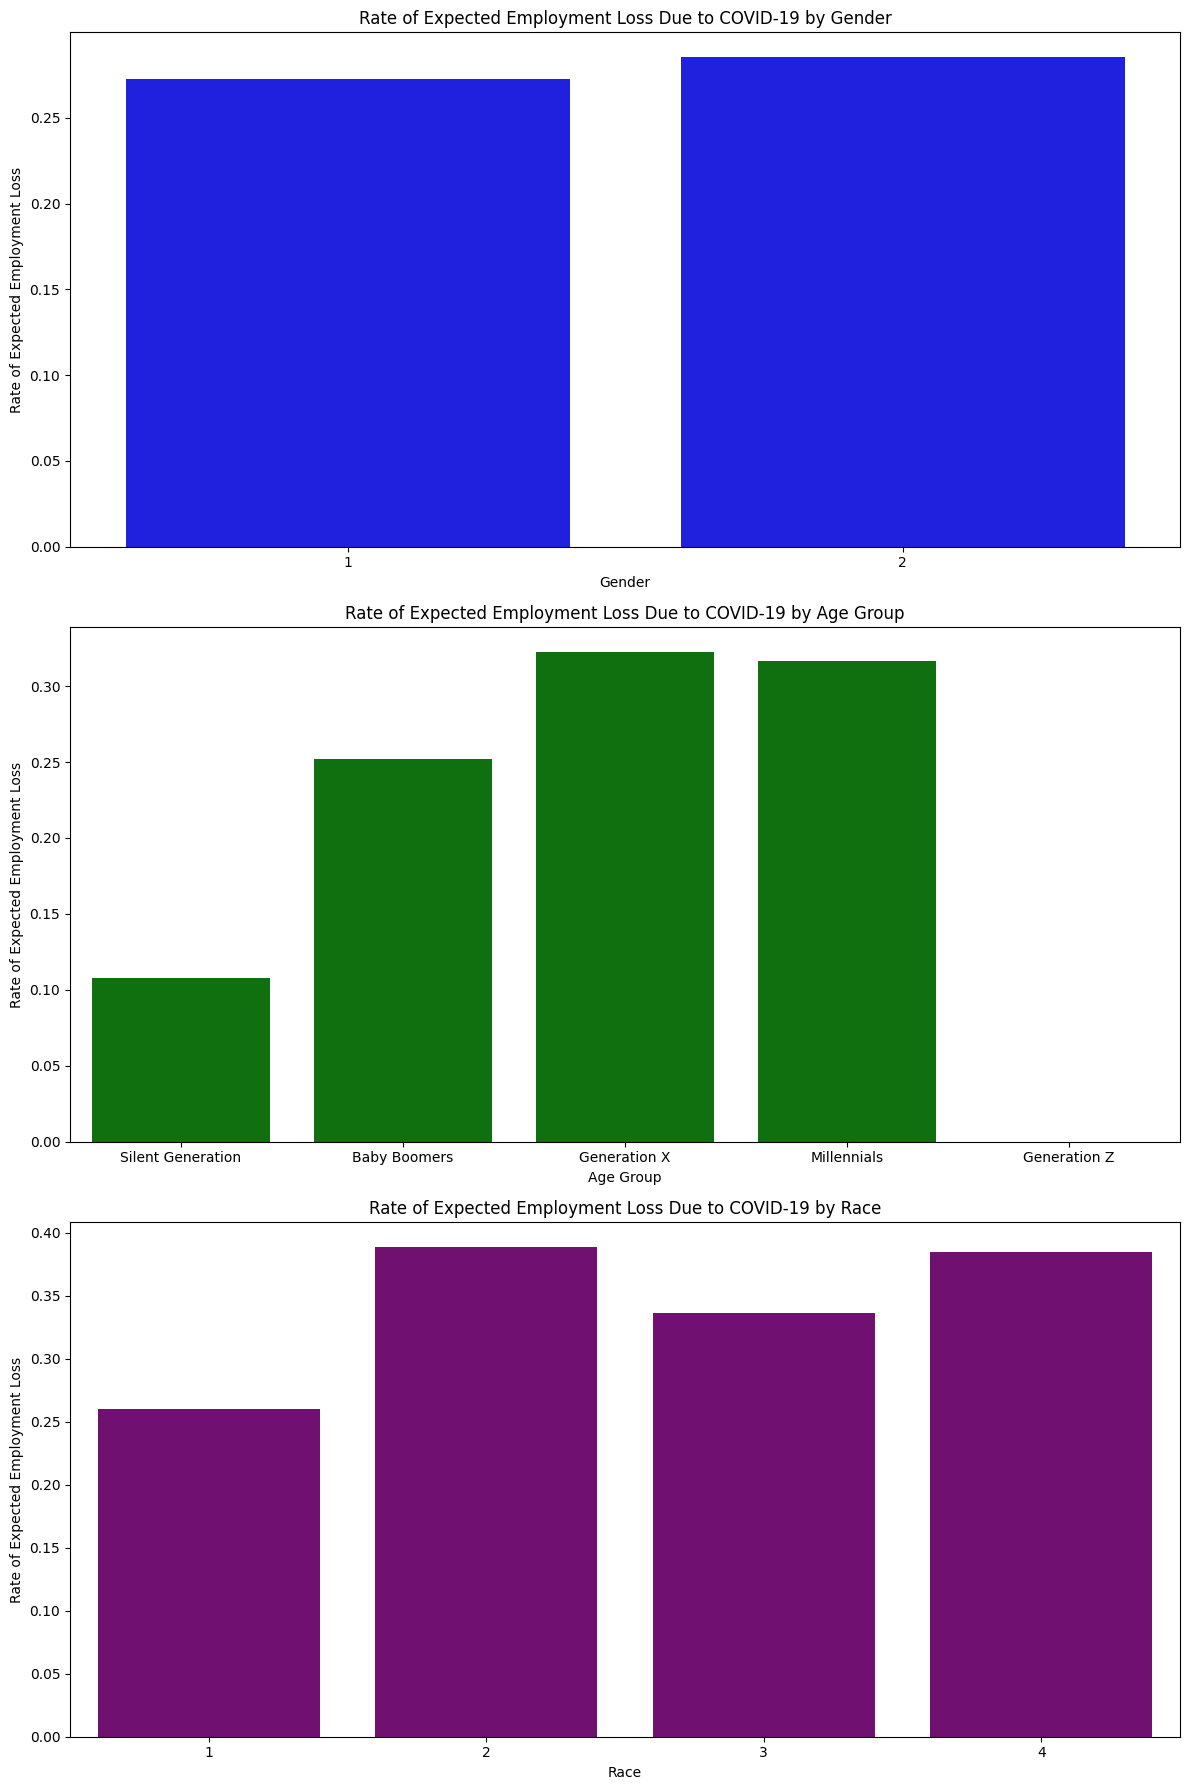

In [ ]:
# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot by Gender
sns.barplot(x='Gender', y='Expected Employment Loss Rate', data=gender_employment_loss, ax=axs[0], color='blue')
axs[0].set_title('Rate of Expected Employment Loss Due to COVID-19 by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Rate of Expected Employment Loss')

# Plot by Age Group
sns.barplot(x='Age Group', y='Expected Employment Loss Rate', data=age_employment_loss, ax=axs[1], color='green')
axs[1].set_title('Rate of Expected Employment Loss Due to COVID-19 by Age Group')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Rate of Expected Employment Loss')

# Plot by Race
sns.barplot(x='Race', y='Expected Employment Loss Rate', data=race_employment_loss, ax=axs[2], color='purple')
axs[2].set_title('Rate of Expected Employment Loss Due to COVID-19 by Race')
axs[2].set_xlabel('Race')
axs[2].set_ylabel('Rate of Expected Employment Loss')

plt.tight_layout()
plt.show()

## 8. Rate of Expected Employment Loss Due to COVID-19 for the Top 10 States with the Highest Rate of COVID Hospitalization

To analyze the rate of expected employment loss due to COVID-19 for the top 10 states with the highest hospitalization rates, we performed the following steps:



In [ ]:
# Display unique state codes in both datasets for comparison
print("State codes in COVID-19 dataset:", covid_data['res_state'].unique())
print("State codes in Pulse Survey dataset:", pulse_survey_data['est_st'].unique())

State codes in COVID-19 dataset: ['MN' 'MI' 'CA' 'NV' 'MA' 'AZ' 'TX' 'FL' 'NY' 'UT' 'PA' 'OH' 'IL' 'WA'
 'NC' 'NE' 'NH' 'GA' 'OR' 'LA' 'AR' 'MT' 'VA' 'VI' 'ND' 'HI' 'AL' 'ME'
 'TN' 'KY' 'WI' 'DC' 'KS' 'WY' 'OK' 'IA' 'RI' 'CO' 'MS' 'ID' 'IN' 'SC' nan
 'PR' 'SD' 'CT' 'AK' 'DE' 'NJ' 'MD' 'WV' 'GU' 'MO' 'VT' 'NM']
State codes in Pulse Survey dataset: [47  1 26  2 25 12 33 53  4  5 13  6 48  8  9 36 10 15 37 16 40 17 18 45
 19 20 27 55 22 21 23 24 28 29 32 49 30 41 31 34 35 38 46 39 42 44 51 11
 54 50 56]


1. **Mapping of State Codes:** Converts state abbreviations to their corresponding numeric codes used in the datasets.
2. **Verification:** Maps numeric codes back to state abbreviations for verification purposes.
3. **Filtering Data:** Filters the pulse survey data to include only respondents from the top 10 states with the highest COVID-19 hospitalization rates.
4. **Calculating Employment Loss Rates:** Calculates the rate of expected employment loss for these top 10 states.
5. **Data Plots:**



Top 10 state codes (numeric): [2, 1, 5, 4, 6, 8, 9, 11, 10, 12]
Filtered survey data for top 10 states:
                        scram  week_x  est_st  est_msa      pweight  \
1  V010000001S10011900470112       1       1      NaN  1929.488419   
3  V010000001S37010301340112       1       1      NaN  2734.635354   
4  V010000001S37010480340111       1       1      NaN   681.211425   
5  V010000001S37010662140111       1       1      NaN  1775.949978   
6  V010000001S51010245800111       1       1      NaN  1647.093908   

   tbirth_year  abirth_year  egender  agender  rhispanic  ...  eipspnd5  \
1         1955            2        1        2          1  ...       NaN   
3         1964            2        1        2          1  ...       NaN   
4         1963            2        2        2          1  ...       NaN   
5         1976            2        2        2          1  ...       NaN   
6         1983            2        2        2          1  ...       NaN   

   eipspnd6  eipspnd7  

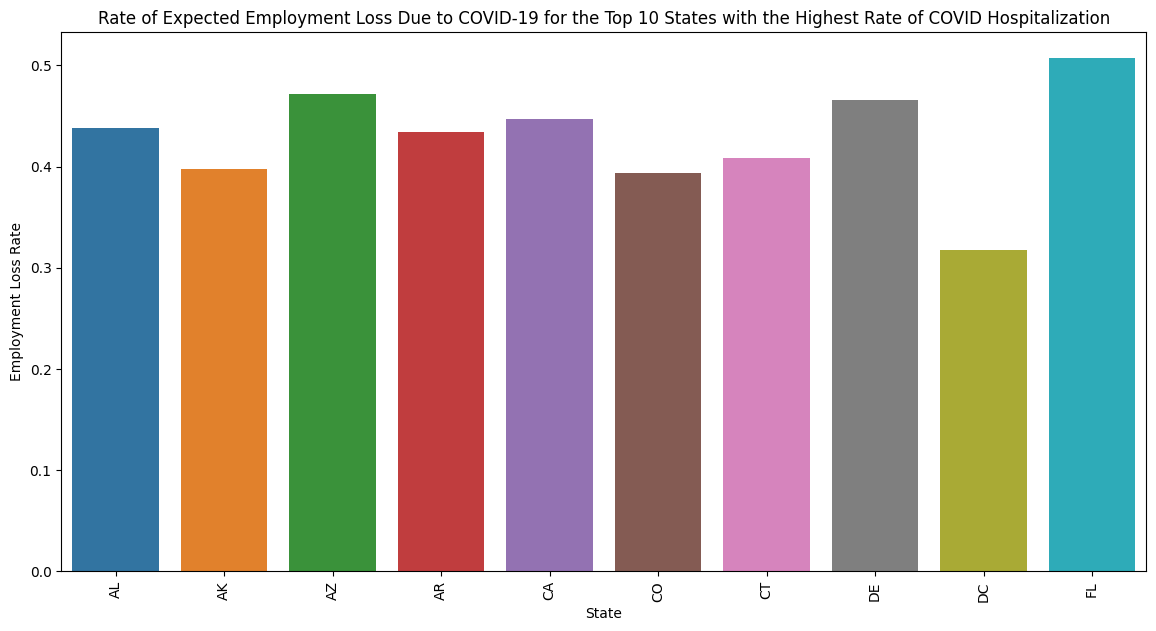

In [ ]:
# Mapping of state codes to numeric codes
state_code_mapping = {
    'AL': 1, 'AK': 2, 'AZ': 4, 'AR': 5, 'CA': 6, 'CO': 8, 'CT': 9, 'DE': 10, 'FL': 12, 'GA': 13,
    'HI': 15, 'ID': 16, 'IL': 17, 'IN': 18, 'IA': 19, 'KS': 20, 'KY': 21, 'LA': 22, 'ME': 23, 'MD': 24,
    'MA': 25, 'MI': 26, 'MN': 27, 'MS': 28, 'MO': 29, 'MT': 30, 'NE': 31, 'NV': 32, 'NH': 33, 'NJ': 34,
    'NM': 35, 'NY': 36, 'NC': 37, 'ND': 38, 'OH': 39, 'OK': 40, 'OR': 41, 'PA': 42, 'RI': 44, 'SC': 45,
    'SD': 46, 'TN': 47, 'TX': 48, 'UT': 49, 'VT': 50, 'VA': 51, 'WA': 53, 'WV': 54, 'WI': 55, 'WY': 56,
    'DC': 11, 'PR': 72, 'GU': 66, 'VI': 78
}

# Reverse mapping for verification purposes
numeric_to_state_code = {v: k for k, v in state_code_mapping.items()}

# Verify top 10 states with the mapping
top_10_state_codes = [state_code_mapping[st] for st in top_10_states if st in state_code_mapping]
print("Top 10 state codes (numeric):", top_10_state_codes)

# Filter pulse_survey_data for respondents from the top 10 states
top_10_data = pulse_survey_data[pulse_survey_data['est_st'].isin(top_10_state_codes)]

# Display the filtered data for verification
print("Filtered survey data for top 10 states:\n", top_10_data.head())

# Calculate the rate of employment loss for these states
employment_loss_top_10 = top_10_data.groupby('est_st')['anywork'].apply(lambda x: (x == 2).mean()).reset_index()
employment_loss_top_10.columns = ['state', 'employment_loss_rate']

# Map back numeric state codes to their abbreviations
employment_loss_top_10['state'] = employment_loss_top_10['state'].map(numeric_to_state_code)

# Display the calculated employment loss rates for verification
print("Employment loss rates for top 10 states:\n", employment_loss_top_10)

# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='employment_loss_rate', data=employment_loss_top_10)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Employment Loss Rate')
plt.title('Rate of Expected Employment Loss Due to COVID-19 for the Top 10 States with the Highest Rate of COVID Hospitalization')
plt.show()


## Relationship Between Household Income and the Rate of Delayed/Unobtained Medical Treatment

To analyze the relationship between household income and the rate of delayed or unobtained medical treatment, we performed the following steps:

1. **Preprocessed the Data:** Converted the `DELAY` and `NOTGET` columns to numeric values (1 for yes, 0 for no) and created a new column representing delayed or unobtained medical treatment.


In [ ]:
# Convert all column names to lower case
pulse_survey_data.columns = pulse_survey_data.columns.str.lower()

# Display unique values for verification
print("Unique values in 'income':", pulse_survey_data['income'].unique())
print("Unique values in 'delay':", pulse_survey_data['delay'].unique())
print("Unique values in 'notget':", pulse_survey_data['notget'].unique())

# Convert 'delay' and 'notget' columns to numeric (1 for yes, 0 for no)
pulse_survey_data['delay'] = pulse_survey_data['delay'].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))
pulse_survey_data['notget'] = pulse_survey_data['notget'].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

# Create a new column representing delayed or unobtained medical treatment
pulse_survey_data['delayed_or_notget'] = pulse_survey_data[['delay', 'notget']].max(axis=1)

# Display the data for verification
print(pulse_survey_data[['income', 'delay', 'notget', 'delayed_or_notget']].head())


Unique values in 'income': [  4   2   8   1   6   5   3   7 -88 -99]
Unique values in 'delay': [  2   1 -88 -99]
Unique values in 'notget': [  2   1 -88 -99]
   income  delay  notget  delayed_or_notget
0       4    0.0     0.0                0.0
1       2    1.0     1.0                1.0
2       8    1.0     1.0                1.0
3       1    1.0     1.0                1.0
4       4    0.0     0.0                0.0


2. **Calculated Rates by Household Income:** Grouped the data by household income and calculated the mean rate of delayed/unobtained medical treatment for each income group.


In [ ]:
# Calculate the rate of delayed/unobtained medical treatment for different household income groups
income_treatment_rate = pulse_survey_data.groupby('income')['delayed_or_notget'].mean().reset_index()
income_treatment_rate.columns = ['household_income', 'treatment_delay_rate']

# Display the calculated rates for verification
print("Treatment delay rates by household income:\n", income_treatment_rate)


Treatment delay rates by household income:
    household_income  treatment_delay_rate
0               -99              0.452692
1               -88              0.428781
2                 1              0.517422
3                 2              0.486592
4                 3              0.482290
5                 4              0.481711
6                 5              0.475991
7                 6              0.470135
8                 7              0.462418
9                 8              0.455754


3. **Visualized the Relationship:** Used a bar plot to visualize the rate of delayed/unobtained medical treatment across different household income groups.

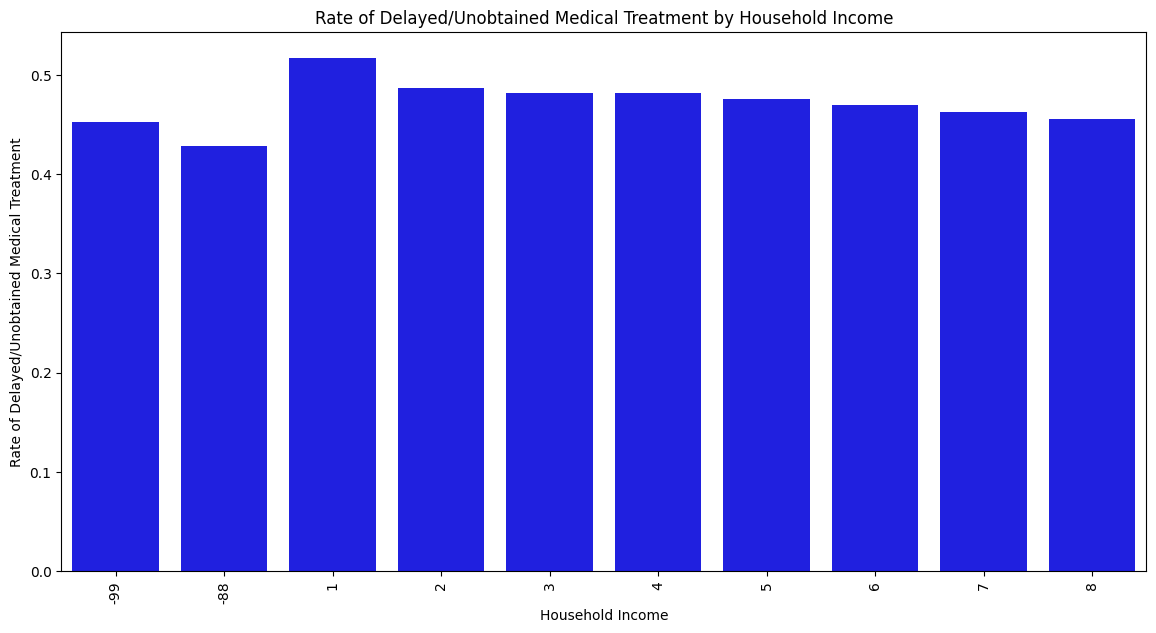

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(x='household_income', y='treatment_delay_rate', data=income_treatment_rate, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Household Income')
plt.ylabel('Rate of Delayed/Unobtained Medical Treatment')
plt.title('Rate of Delayed/Unobtained Medical Treatment by Household Income')
plt.show()


#### Relationship Between COVID-19 Symptom Manifestation and Age Group

To analyze the relationship between COVID-19 symptom manifestation and age group, we performed the following steps:

1. **Preprocessed the Data:** Converted the `symptom_status` column to numeric values (1 for symptomatic, 0 for asymptomatic/missing).



In [ ]:

# Display unique values for verification
print("Unique values in 'age_group':", covid_data['age_group'].unique())
print("Unique values in 'symptom_status':", covid_data['symptom_status'].unique())

# Convert 'symptom_status' to numeric (1 for symptomatic, 0 for asymptomatic/missing)
covid_data['symptom_status'] = covid_data['symptom_status'].apply(lambda x: 1 if x == 'Symptomatic' else (0 if x == 'Asymptomatic' else np.nan))

# Display the data for verification
print(covid_data[['age_group', 'symptom_status']].head())


Unique values in 'age_group': ['18 to 49 years', '65+ years', '0 - 17 years', '50 to 64 years', 'Missing']
Categories (5, object): ['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years', 'Missing']
Unique values in 'symptom_status': ['Missing' 'Unknown' 'Symptomatic' 'Asymptomatic']
        age_group  symptom_status
0  18 to 49 years             NaN
1  18 to 49 years             NaN
2  18 to 49 years             NaN
3  18 to 49 years             NaN
4       65+ years             1.0


2. **Calculated Rates by Age Group:** Grouped the data by age group and calculated the mean rate of symptom manifestation for each age group.


In [ ]:
# Calculate the rate of symptom manifestation for different age groups
age_symptom_rate = covid_data.groupby('age_group')['symptom_status'].mean().reset_index()
age_symptom_rate.columns = ['age_group', 'symptom_rate']

# Display the calculated rates for verification
print("Symptom manifestation rates by age group:\n", age_symptom_rate)


/tmp/ipykernel_34/4223560076.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_symptom_rate = covid_data.groupby('age_group')['symptom_status'].mean().reset_index()


Symptom manifestation rates by age group:
         age_group  symptom_rate
0    0 - 17 years      0.958621
1  18 to 49 years      0.972319
2  50 to 64 years      0.971923
3       65+ years      0.958180
4         Missing      0.915915


3. **Visualized the Relationship:** Used a bar plot to visualize the rate of symptom manifestation across different age groups.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


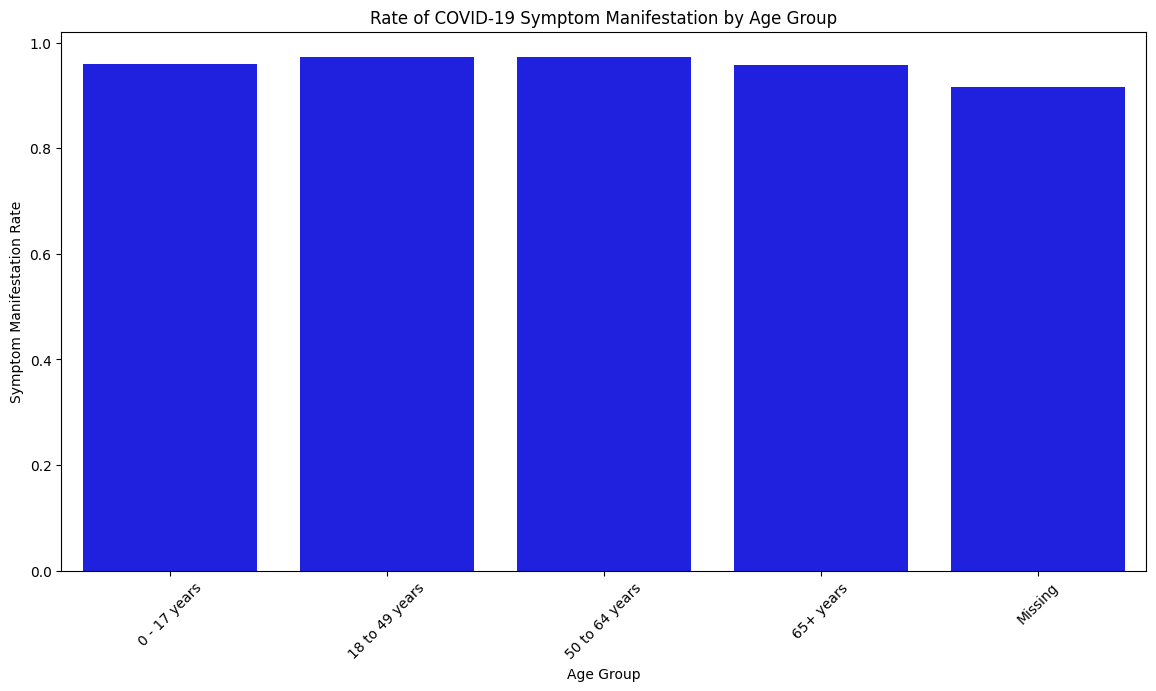

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(x='age_group', y='symptom_rate', data=age_symptom_rate, color='blue')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Symptom Manifestation Rate')
plt.title('Rate of COVID-19 Symptom Manifestation by Age Group')
plt.show()
